In [3]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

import seaborn as sns

In [4]:
msft = yf.Ticker("CIB")
apple = yf.Ticker("AAPL")
oil = yf.Ticker('CL=F')
gold = yf.Ticker('GC=F')

In [5]:
gold.history(period="2y", interval="1wk")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-04-05 00:00:00-04:00,1727.900024,1758.000000,1721.900024,1743.300049,3504,0.0,0.0
2021-04-12 00:00:00-04:00,1740.800049,1779.500000,1722.099976,1779.000000,2437,0.0,0.0
2021-04-19 00:00:00-04:00,1782.099976,1794.500000,1765.500000,1777.000000,2349,0.0,0.0
2021-04-26 00:00:00-04:00,1778.000000,1789.000000,1758.599976,1767.300049,1636,0.0,0.0
2021-05-03 00:00:00-04:00,1788.500000,1842.900024,1774.800049,1831.099976,272,0.0,0.0
...,...,...,...,...,...,...,...
2023-03-06 00:00:00-05:00,1853.300049,1868.500000,1811.500000,1862.000000,1110,0.0,0.0
2023-03-13 00:00:00-04:00,1890.800049,1985.099976,1875.099976,1969.800049,1650,0.0,0.0
2023-03-20 00:00:00-04:00,1988.300049,2003.900024,1938.000000,1982.099976,538,0.0,0.0


In [37]:
msft = yf.Ticker("CIB")
apple = yf.Ticker("AAPL")

historical_data = gold.history(period="3y", interval="1wk")

Acabamos de calcula el cambio porcentual que es 

  $$Retornos =  \frac{x_{t-1}-x_t}{100} $$

- Al retorno inicial lo tomaremos como cero

In [38]:
historical_data['Retornos'] = historical_data['Close'].pct_change().fillna(0)

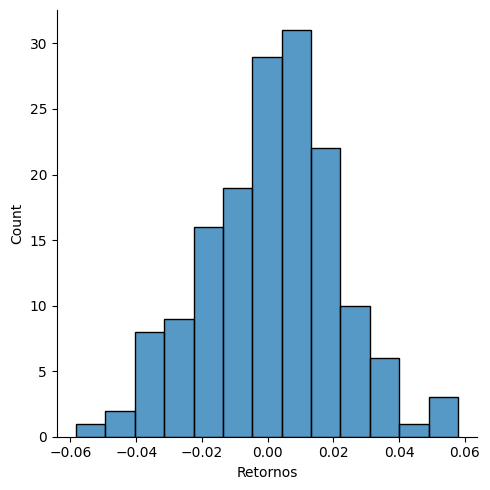

In [39]:
sns.displot(historical_data['Retornos'],)


<Axes: xlabel='Date'>

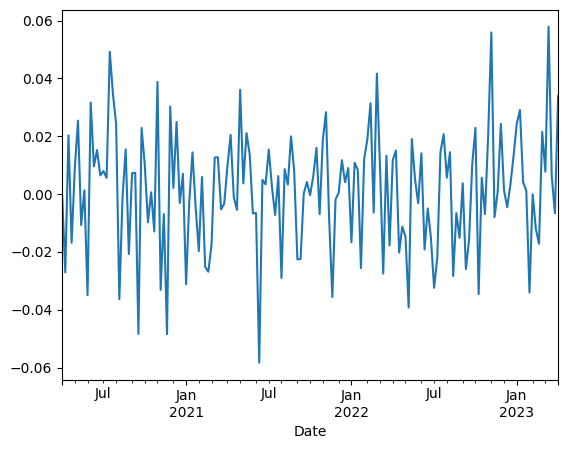

In [40]:
historical_data['Retornos'].plot()

In [22]:
retBan = historical_data['Retornos']

## Preguntas a responder
- Es estacionaria
- Que distribucion sigue
- Que modelo se ajusta

## PACF y ACF

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

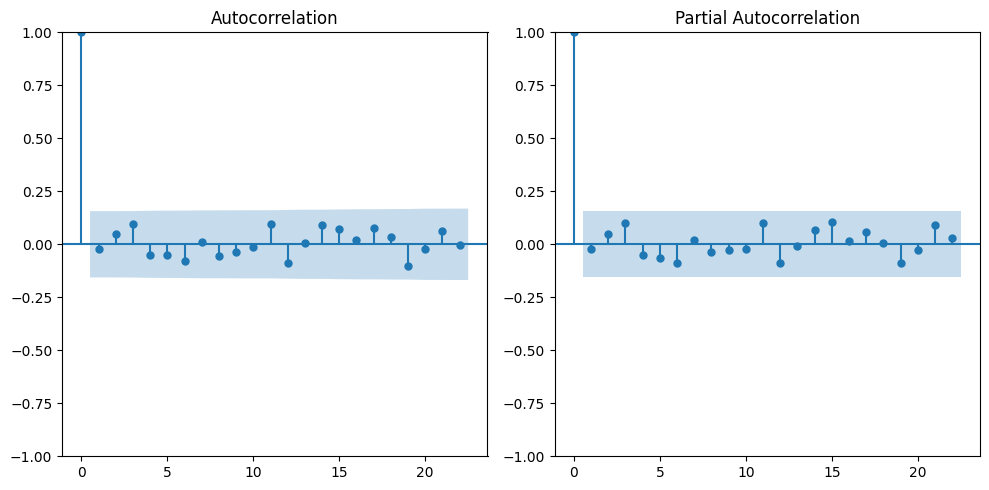

In [42]:
# Graficamos ambas figuras en la misma imagen
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))

plot_acf(retBan, ax=ax1)
plot_pacf(retBan, method='ywm',ax=ax2)

plt.tight_layout()

# Mostramos la figura
plt.show()

## Analisis en el espacio de las frecuencias

In [25]:
from scipy import signal

f, Pxx = signal.periodogram(retBan)

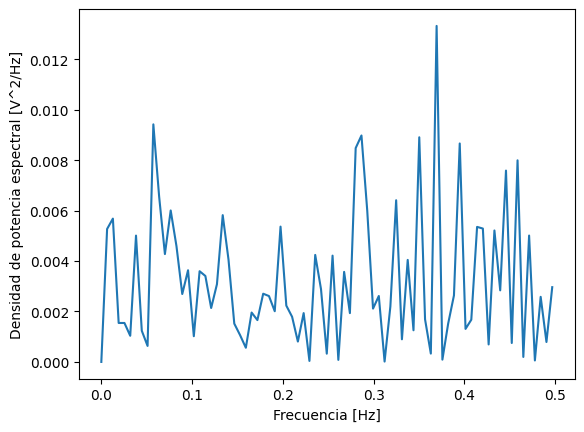

In [43]:

# Graficar el espectro de potencia
plt.plot(f,Pxx)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad de potencia espectral [V^2/Hz]')
plt.show()


+ No se encontraron frecuencias significativamente diferentes
+ Se realizó una prueba de estacionariedad boxC y resulto que no hay evidencia significativa para afirmar que es estacionaria. 